Processing FloorSet-Prime Batches:   0% 0/100 [00:00<?, ?it/s]

area-target data: torch.Size([1, 21]), pins_pos: torch.Size([1, 56, 2]), b2b_connectivity: torch.Size([1, 13, 3]), p2b_connectivity: torch.Size([1, 118, 3]), placement_constraints: torch.Size([1, 21, 5]) polygon_shapes: 21


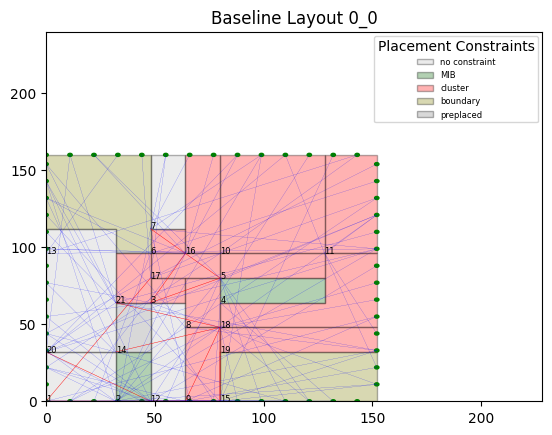

Processing FloorSet-Prime Batches:   0% 0/100 [00:00<?, ?it/s]


In [2]:
import torch
from torch.utils.data import DataLoader
from test_dataset import FloorplanDataset, floorplan_collate
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Patch, Circle
import matplotlib.patches as patches
from shapely.geometry import Polygon, LineString, Point
import copy
from visualize import get_hard_color, visualize_prime
from tqdm import tqdm


def main():
    root = './'
    ds = FloorplanDataset(root)
    
    # Create DataLoader with no shuffling for effective file caching
    dl = DataLoader(
        ds, 
        batch_size=1,#1-layout per configuration 
        shuffle=False,
        collate_fn=floorplan_collate
    )
    
    # Iterate over DataLoader
    for batch_idx, batch in tqdm(enumerate(dl), total=len(dl), desc='Processing FloorSet-Prime Batches'):

        area_target, b2b_connectivity, p2b_connectivity, pins_pos, placement_constraints = batch[0]
        sol, metrics = batch[1]
    
        # Print sizes of data for debugging
        # area_target: bsz x n_blocks - Area targets for each block
        # b2b_connectivity: bsz x b2b_edges x edge-weight - Block-to-block connectivity
        # p2b_connectivity: bsz x p2b_edges x edge-weight - Pin-to-block connectivity
        # pins_pos: bsz x n_pins x 2 - Pins or terminals (x, y) location
        # placement_constraints: bsz x n_blocks x 5 - Constraints [fixed, preplaced, multi-instantiation, cluster, boundary]
        # sol: bsz x n_blocks - Polygon shape of each block (target solution) containing a list of polygon vertices for each block.
        # metrics: [area, num_pins, num_total_nets, num_b2b_nets, num_p2b_nets, num_hardconstraints, b2b_weighted_wl, p2b_weighted_wl]
        
        print(f'area-target data: {area_target.size()}, '
              f'pins_pos: {pins_pos.size()}, '
              f'b2b_connectivity: {b2b_connectivity.size()}, '
              f'p2b_connectivity: {p2b_connectivity.size()}, '
              f'placement_constraints: {placement_constraints.size()}',
              f'polygon_shapes: {len(sol[0])}')
    
        

        # Visualize results of the first samples of each batch
        for vis_ind in range(1):
            layout_ind = str(batch_idx)+'_'+str(vis_ind)
            visualize_prime(
                sol[vis_ind], 
                b2b_connectivity[vis_ind], 
                p2b_connectivity[vis_ind], 
                pins_pos[vis_ind], 
                placement_constraints[vis_ind],
                layout_ind
            )
        break

if __name__ == "__main__":
    main()